In [6]:
# import os
import sys
# from pathlib import Path

# module_path = os.path.abspath(os.path.join('../'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

# import json
import numpy as np
# import pandas as pd
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# from tqdm import tqdm
# from pathlib import Path
# from scipy.ndimage import gaussian_filter
# from matplotlib.colors import LogNorm

# sys.path.append("code/preprocessing/utils/")
# from segment2D     import *
# from segment3D     import *
# from file_handling import *

sys.path.append("code/analysis/utils/")
from data_class import AutocorrelationData, SegmentationData#, VariationData,
# from variation_functions import spatial_variation, global_density

# pix_to_um = get_pixel_size()

In [18]:
# experimental parameters
frames_to_hours = 1 / 12


# analytical parameters
bin_data = False
param = 'hh'


# define density colormap
densities  = np.arange(1400, 3400)
Ndensities = len(densities)

cmap   = mpl.colormaps['viridis']
colors = cmap(np.linspace(0.1, 0.9, Ndensities))
sm     = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=densities.min(), vmax=densities.max()))

## Plotting datasets from dish A2

In [19]:
datasets = ["holomonitor_20240516_A2-1",
            "holomonitor_20240516_A2-7"]

data_avrg = "holomonitor_20240516_A2"

# Load data
cellcorr  = []
fieldcorr = []
cellcorr_avrg  = AutocorrelationData(f"data/experimental/processed/{data_avrg}/cell_autocorr.p")
fieldcorr_avrg = AutocorrelationData(f"data/experimental/processed/{data_avrg}/field_autocorr.p")

i = 0
for data in datasets:
    cellcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/cell_autocorr.p"))
    fieldcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/field_autocorr.p"))

    # add density
    cellprop = SegmentationData(f"data/experimental/processed/{data}/cell_props.p")
    cellcorr[i].add_density(cellprop.A)

    i += 1

State loaded from data/experimental/processed/holomonitor_20240516_A2/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-1/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-1/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-1/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_A2-1/cell_autocorr.p
State loaded from data/experimental/processed/holomonitor_20240516_A2-7/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-7/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-7/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_A2-7/cell_autocorr.p


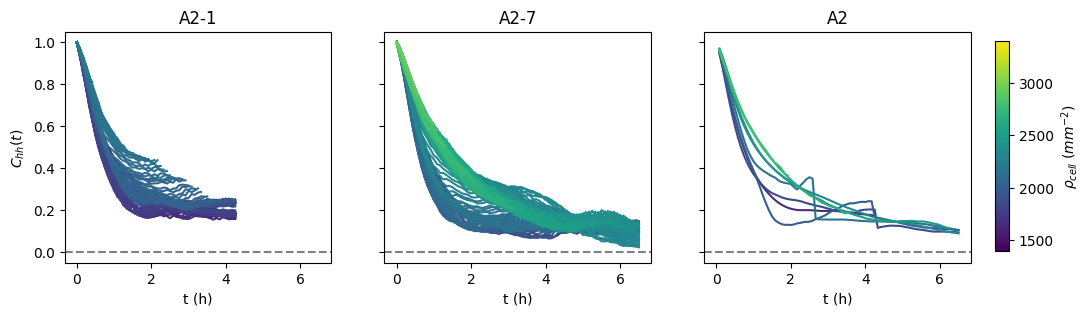

In [20]:
fig, ax = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([datasets, [data_avrg]])
for i in range(len(fieldcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="t (h)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=r"$C_{hh}(t)$")


# plot datasets
for data_idx in range(len(fieldcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = fieldcorr[data_idx].bin_data('t', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(fieldcorr[data_idx].t_array[param] * frames_to_hours, 
                              data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(fieldcorr[data_idx].temporal[param])

        for i in range(Nframes):
            density_idx = int(fieldcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(fieldcorr[data_idx].t_array[param] * frames_to_hours, 
                              fieldcorr[data_idx].temporal[param][i], c=colors[density_idx])



# plot average
Nbins = len(fieldcorr_avrg.temporal[param])
for i in range(Nbins):
    density_idx = int(fieldcorr_avrg.density[i]) - densities.min()
    ax[2].plot(fieldcorr_avrg.t_array[param] * frames_to_hours, 
               fieldcorr_avrg.temporal[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)

Density array is longer than correlation array! Forcing equal length 104
Density array is longer than correlation array! Forcing equal length 159


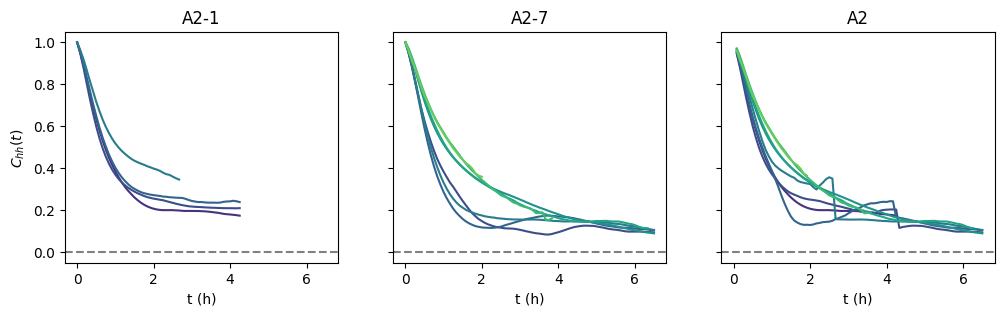

In [10]:
ig, ax = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([datasets, [data_avrg]])
for i in range(len(fieldcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="t (h)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=r"$C_{hh}(t)$")


# plot datasets
for data_idx in range(len(fieldcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = fieldcorr[data_idx].bin_data('t', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(fieldcorr[data_idx].t_array[param] * frames_to_hours, 
                              data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(fieldcorr[data_idx].temporal[param])

        for i in range(Nframes):
            density_idx = int(fieldcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(fieldcorr[data_idx].t_array[param] * frames_to_hours, 
                              fieldcorr[data_idx].temporal[param][i], c=colors[density_idx])



# plot average
Nbins = len(fieldcorr_avrg.temporal[param])
for i in range(Nbins):
    density_idx = int(fieldcorr_avrg.density[i]) - densities.min()
    ax[2].plot(fieldcorr_avrg.t_array[param] * frames_to_hours, 
               fieldcorr_avrg.temporal[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)

## Plot cell correlations

Density array is longer than correlation array! Forcing equal length 104
Density array is longer than correlation array! Forcing equal length 181


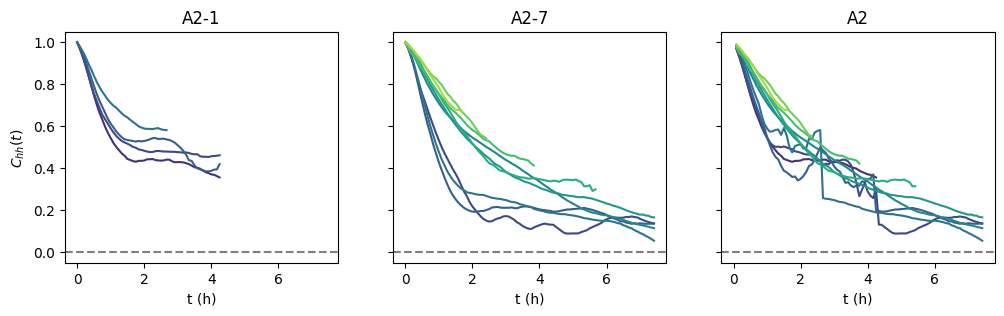

In [17]:
ig, ax = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([datasets, [data_avrg]])
for i in range(len(cellcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="t (h)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=r"$C_{hh}(t)$")


# plot datasets
for data_idx in range(len(cellcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = cellcorr[data_idx].bin_data('t', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(cellcorr[data_idx].t_array[param] * frames_to_hours, 
                              data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(cellcorr[data_idx].temporal[param])

        for i in range(Nframes):
            density_idx = int(cellcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(cellcorr[data_idx].t_array[param] * frames_to_hours, 
                              cellcorr[data_idx].temporal[param][i], c=colors[density_idx])



# plot average
Nbins = len(cellcorr_avrg.temporal[param])
for i in range(Nbins):
    density_idx = int(cellcorr_avrg.density[i]) - densities.min()
    ax[2].plot(cellcorr_avrg.t_array[param] * frames_to_hours, 
               cellcorr_avrg.temporal[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)